In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # ignore all warnings

In [10]:
# reading the data
df=pd.read_csv('indiastartups1.csv')
df.head()

,Unnamed: 0,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
0,0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,202001
1,1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,202001
2,2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,202001
3,3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN,202001
4,4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,202001


#### Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3044 non-null   int64  
 1   SNo               3044 non-null   int64  
 2   Date              3044 non-null   object 
 3   StartupName       3044 non-null   object 
 4   IndustryVertical  2873 non-null   object 
 5   SubVertical       2108 non-null   object 
 6   City              2864 non-null   object 
 7   InvestorsName     3020 non-null   object 
 8   InvestmentType    3040 non-null   object 
 9   AmountInUSD       3044 non-null   float64
 10  Remarks           419 non-null    object 
 11  yearmonth         3044 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 285.5+ KB


In [12]:
df.shape

(3044, 12)

In [13]:
df.describe()

,Unnamed: 0,SNo,AmountInUSD,yearmonth
count,3044.000000,3044.000000,3.044000e+03,3044.000000
mean,1521.500000,1522.500000,1.327006e+07,201630.420828
std,878.871435,878.871435,1.044042e+08,111.330291
min,0.000000,1.000000,-9.990000e+02,201501.000000
25%,760.750000,761.750000,-9.990000e+02,201511.000000
50%,1521.500000,1522.500000,5.000000e+05,201607.000000
75%,2282.250000,2283.250000,4.000000e+06,201706.000000
max,3043.000000,3044.000000,3.900000e+09,202001.000000


In [14]:
df.columns

Index(['Unnamed: 0', 'SNo', 'Date', 'StartupName', 'IndustryVertical',
       'SubVertical', 'City', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks', 'yearmonth'],
      dtype='object')

#### Data Cleaning

In [15]:
df.drop(['Unnamed: 0','SNo'],axis=1,inplace=True) # droping the Unnamed: 0 and SNo column

In [16]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,202001
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,202001
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,202001
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN,202001
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,202001


In [17]:
df.head(1)

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,202001


In [18]:
# check for the missing values
df.isnull().sum().sort_values(ascending=False)

Remarks             2625
SubVertical          936
City                 180
IndustryVertical     171
InvestorsName         24
InvestmentType         4
Date                   0
StartupName            0
AmountInUSD            0
yearmonth              0
dtype: int64

In [19]:
total=df.isnull().sum()
percentage=((total/len(df))*100)
miss_val=pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
miss_val.sort_values(ascending=False,by='Total')

,Total,Percentage
Remarks,2625,86.235217
SubVertical,936,30.749014
City,180,5.913272
IndustryVertical,171,5.617608
InvestorsName,24,0.788436
InvestmentType,4,0.131406
Date,0,0.000000
StartupName,0,0.000000
AmountInUSD,0,0.000000
yearmonth,0,0.000000


In [20]:
df.drop('Remarks',axis=1,inplace=True)  # droping the Remarks column


In [21]:
df.columns

Index(['Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'yearmonth'],
      dtype='object')

In [22]:
df.shape

(3044, 9)

<Axes: >

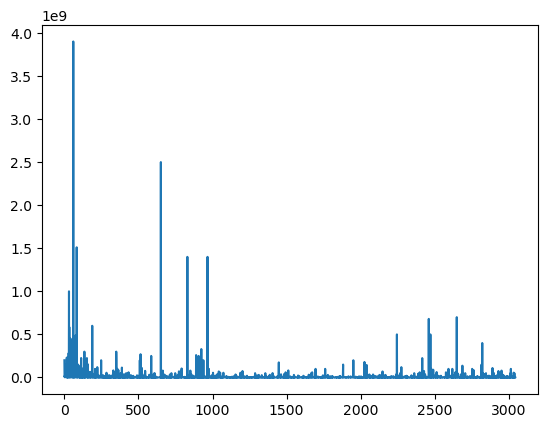

In [23]:
df['AmountInUSD'].plot(kind='line')

In [24]:
df['AmountInUSD'].max()

3900000000.0

In [25]:
df.dtypes

Date                 object
StartupName          object
IndustryVertical     object
SubVertical          object
City                 object
InvestorsName        object
InvestmentType       object
AmountInUSD         float64
yearmonth             int64
dtype: object

In [26]:
df.head(1)

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001


###  How Does the Funding Ecosystem changes with respect to Time?

In [28]:

df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')  # converting the date column to date time format

In [29]:
df.dtypes

Date                datetime64[ns]
StartupName                 object
IndustryVertical            object
SubVertical                 object
City                        object
InvestorsName               object
InvestmentType              object
AmountInUSD                float64
yearmonth                    int64
dtype: object

In [30]:
df['Date'].dt.year*100

0       202000
1       202000
2       202000
3       202000
4       202000
         ...  
3039    201500
3040    201500
3041    201500
3042    201500
3043    201500
Name: Date, Length: 3044, dtype: int64

In [31]:
df['yearmonth']=(df['Date']).dt.year*100+df['Date'].dt.month

In [32]:
df['yearmonth']

0       202001
1       202001
2       202001
3       202001
4       202001
         ...  
3039    201501
3040    201501
3041    201501
3042    201501
3043    201501
Name: yearmonth, Length: 3044, dtype: int64

In [33]:
df['yearmonth'].value_counts().sort_values(ascending=False)

201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
201506     86
201603     85
201610     80
201605     79
201604     79
201609     73
201611     72
201612     72
201701     72
201703     71
201704     71
201705     68
201706     65
201607     64
201504     63
201505     61
201503     60
201709     58
201502     55
201710     53
201501     53
201711     50
201702     48
201708     45
201712     43
201707     43
201802     42
201801     37
201807     36
201803     35
201804     35
201806     32
201808     25
201805     23
201811     18
201908     17
201911     15
201906     15
201904     14
201809     13
201907     13
201912     10
201909      9
201905      9
201810      7
201812      7
202001      7
201902      3
201901      3
201910      3
Name: yearmonth, dtype: int64

In [34]:
yearmonth=df['yearmonth'].value_counts()
yearmonth.values

array([104, 100,  98,  98,  98,  93,  92,  89,  88,  87,  86,  85,  80,
        79,  79,  73,  72,  72,  72,  71,  71,  68,  65,  64,  63,  61,
        60,  58,  55,  53,  53,  50,  48,  45,  43,  43,  42,  37,  36,
        35,  35,  32,  25,  23,  18,  17,  15,  15,  14,  13,  13,  10,
         9,   9,   7,   7,   7,   3,   3,   3], dtype=int64)

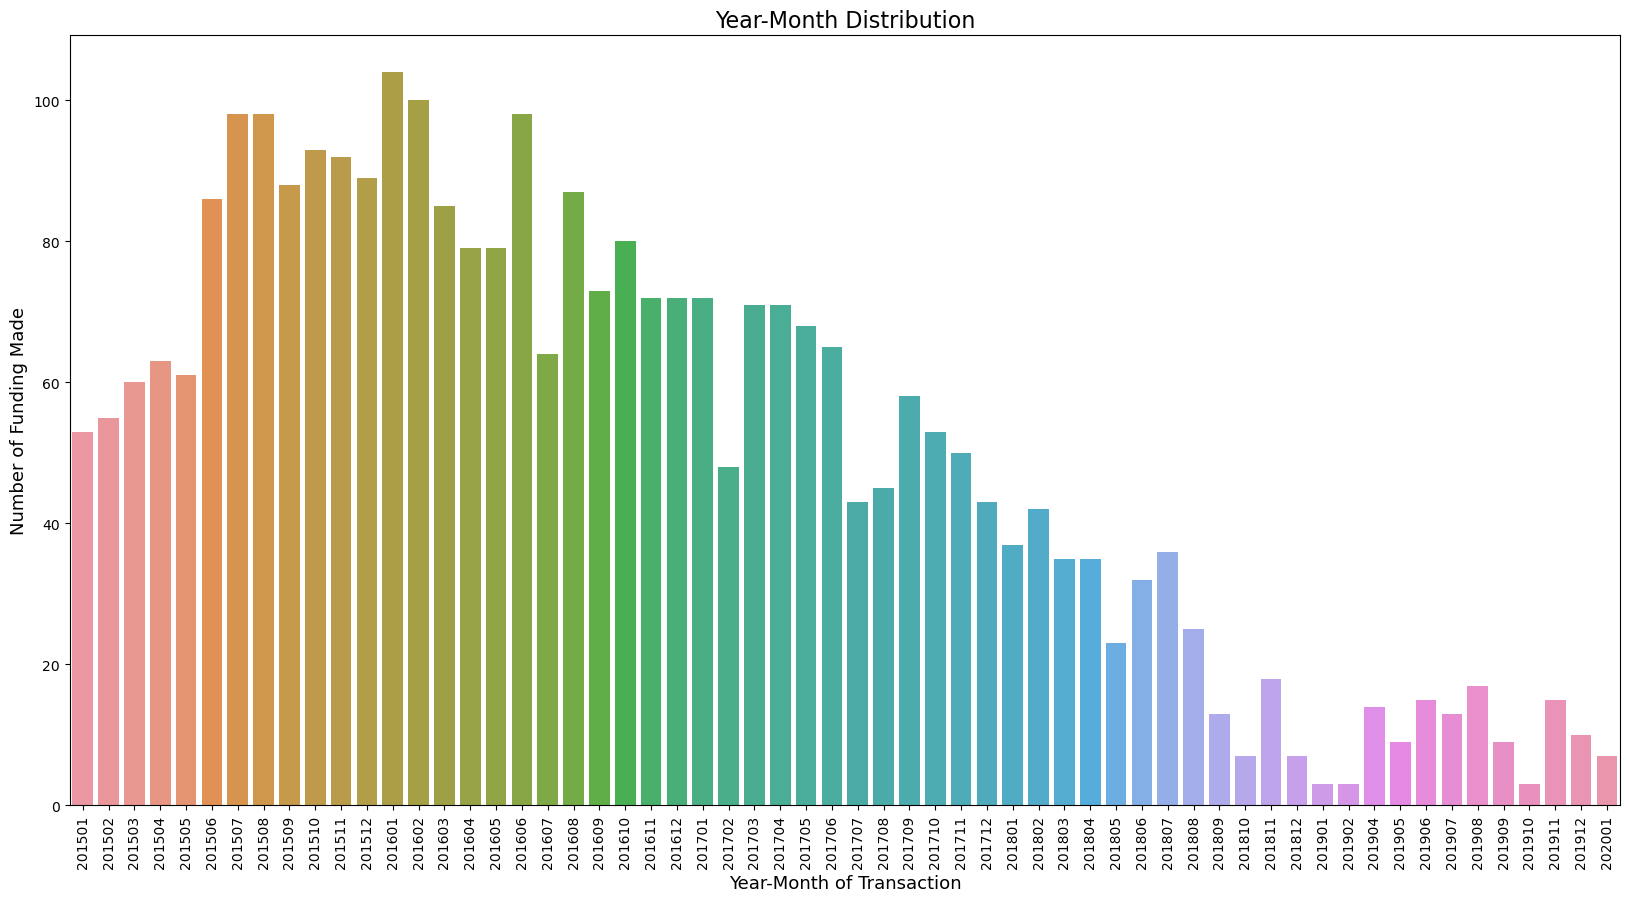

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x=yearmonth.index,y=yearmonth.values)
plt.xticks(rotation='vertical')
plt.title('Year-Month Distribution',fontsize=16)
plt.xlabel('Year-Month of Transaction',fontsize=13)
plt.ylabel('Number of Funding Made',fontsize=13)
plt.show()

### What is the General Amount that Startups get in India?

In [36]:
df.columns

Index(['Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'yearmonth'],
      dtype='object')

In [37]:
round(df['AmountInUSD'].mean(),2)

13270058.26

In [38]:
df['AmountInUSD'].value_counts()

-999.0          971
 1000000.0      166
 500000.0       108
 2000000.0       69
 5000000.0       67
               ... 
 270000000.0      1
 329230.0         1
 692000.0         1
 8250000.0        1
 3250000.0        1
Name: AmountInUSD, Length: 458, dtype: int64

In [39]:
print('Total number of startup funded were', df['StartupName'].nunique())

Total number of startup funded were 2457


### number of funding given to each startups

In [40]:

startup=df['StartupName'].value_counts().head(20)

Text(0.5, 1.0, 'Number of funding Rounds startup made')

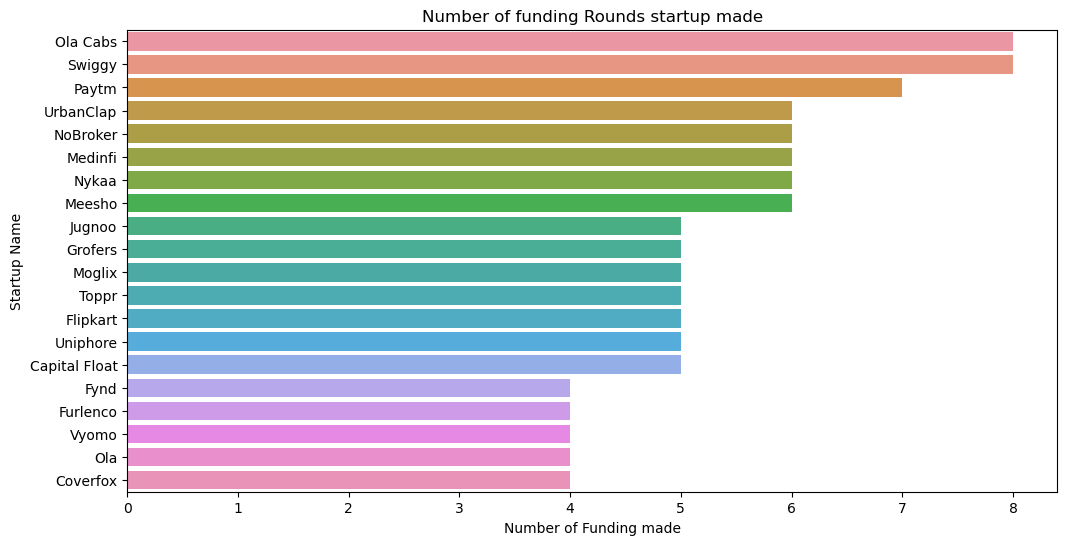

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(y=startup.index,x=startup.values)
plt.xlabel('Number of Funding made')
plt.ylabel('Startup Name')
plt.title('Number of funding Rounds startup made')


### Which Kind of Industries are more preferred for Startups?

In [42]:

df['IndustryVertical'].value_counts()

Consumer Internet                        941
Technology                               478
eCommerce                                186
Healthcare                                70
Finance                                   62
                                        ... 
Developer Portfolio Showcase platform      1
Doctors Network Mobile App                 1
End-to-End Lending platform                1
on-demand healthcare marketplace           1
Online Travel Marketplace                  1
Name: IndustryVertical, Length: 821, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

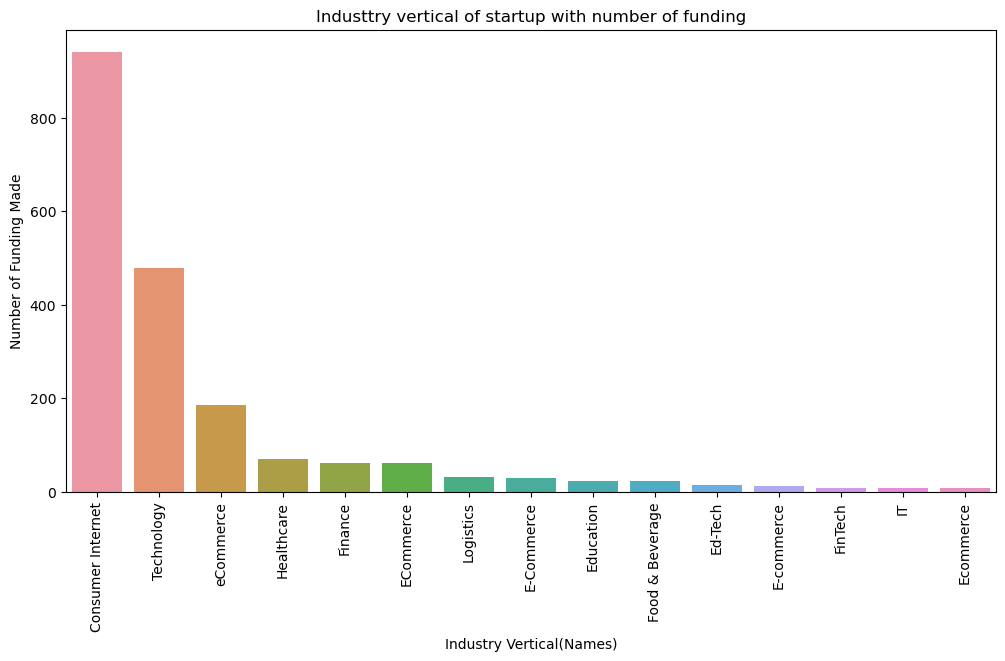

In [43]:
industry=df['IndustryVertical'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=industry.index,y=industry.values)
plt.xticks(rotation='vertical')
plt.xlabel('Industry Vertical(Names)')
plt.ylabel('Number of Funding Made')
plt.title('Industtry vertical of startup with number of funding')
plt.show

In [44]:
df['SubVertical'].value_counts().head(20)

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Education Platform                         5
Education                                         5
Online lending platform                           5
Online Learning Platform                          5
Online Lending                                    5
Non-Banking Financial Company                     4
Online Food Delivery                              4
B2B Marketplace                                   3
Online Insurance Platform                         3
Agri-tech                                         3
SaaS                                              3
Online Insurance Aggregator                       3
Online platform for Higher Education Services     3
ECommerce Marketplace                             3
Online Gifting platform                           3
Online Marketplace                                3
Data Analyti

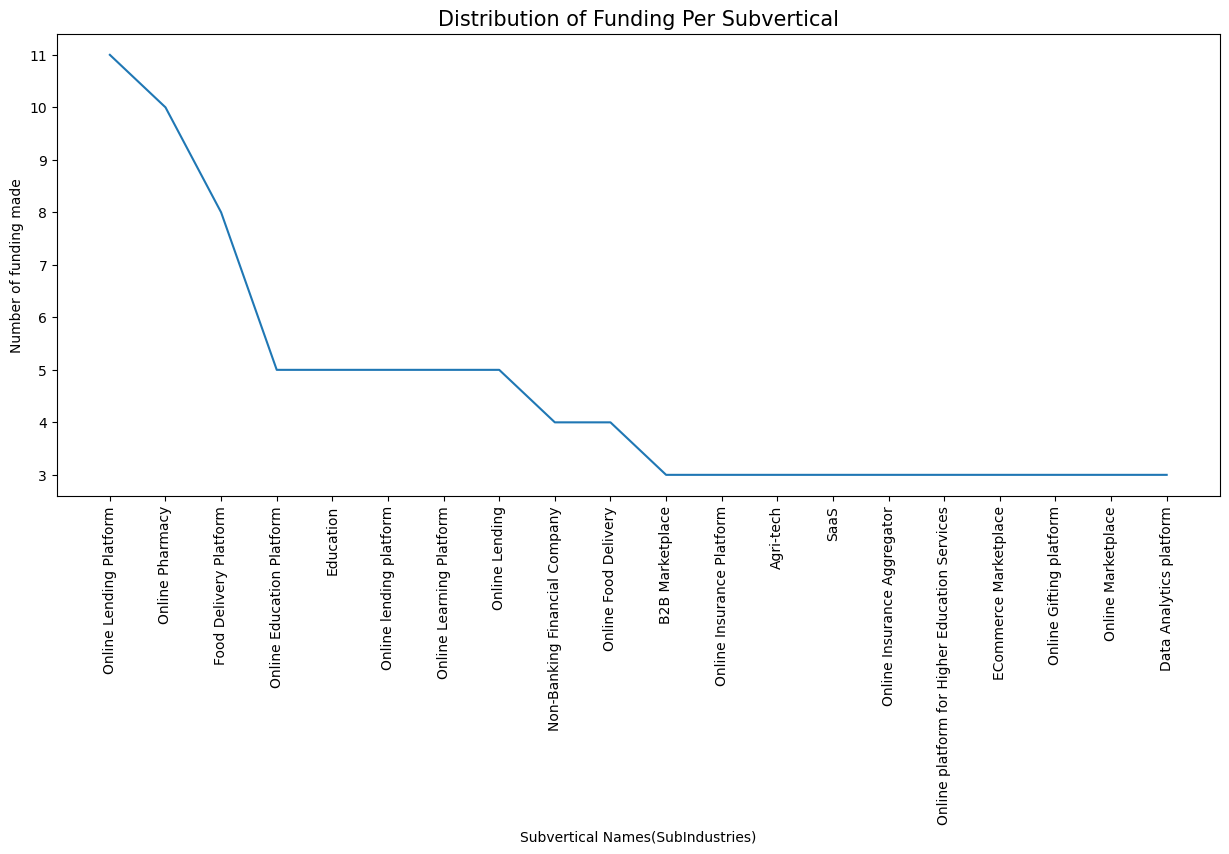

In [45]:
subvertical=df['SubVertical'].value_counts().head(20)
plt.figure(figsize=(15,6))
sns.lineplot(x=subvertical.index,y=subvertical.values)
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical Names(SubIndustries)')
plt.ylabel('Number of funding made')
plt.title('Distribution of Funding Per Subvertical',fontsize=15)
plt.show()

### Does Location also play a role, In determining the Growth of a Startup?

In [46]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001
2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,202001
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202001
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202001


In [47]:

df['City'].nunique()

107

In [48]:
city=df['City'].value_counts().head(15)

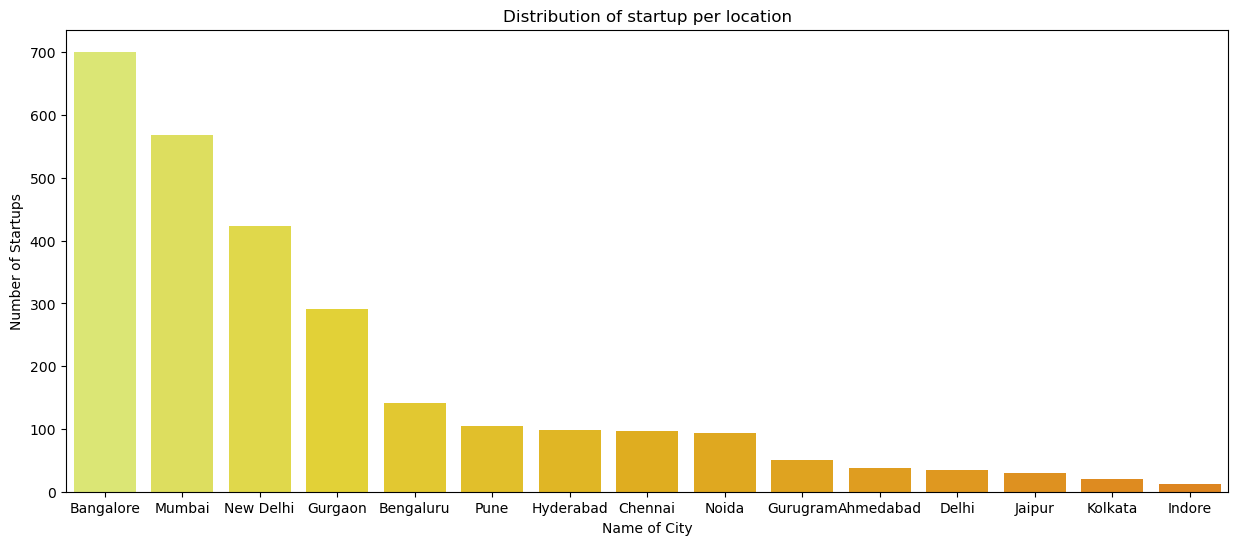

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(x=city.index,y=city.values,palette='Wistia')
plt.xlabel('Name of City')
plt.ylabel('Number of Startups')
plt.title('Distribution of startup per location')
plt.show()


### Who plays the main role in Indian Startups Ecosystem?

In [50]:

df['InvestorsName'].value_counts().head(20)

Undisclosed Investors       39
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             15
Accel Partners              12
Undisclosed Investor        12
undisclosed investors       11
Undisclosed                 11
Venture Catalysts           11
Brand Capital               11
RoundGlass Partners         10
SAIF Partners               10
Nexus Venture Partners       9
Info Edge (India) Ltd        9
Tiger Global                 9
Undisclosed investor         9
Blume Ventures               8
Name: InvestorsName, dtype: int64

In [51]:
df['InvestorsName']=='Undisclosed Investors'

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Name: InvestorsName, Length: 3044, dtype: bool

In [52]:
df['InvestorsName'][df['InvestorsName']=='Undisclosed Investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='undisclosed Investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='undisclosed investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed investor']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed Investor']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='nan']='Undisclosed Investors'

In [54]:
investor_name=df['InvestorsName'].value_counts().head(10)
investor_name

Undisclosed Investors       112
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64

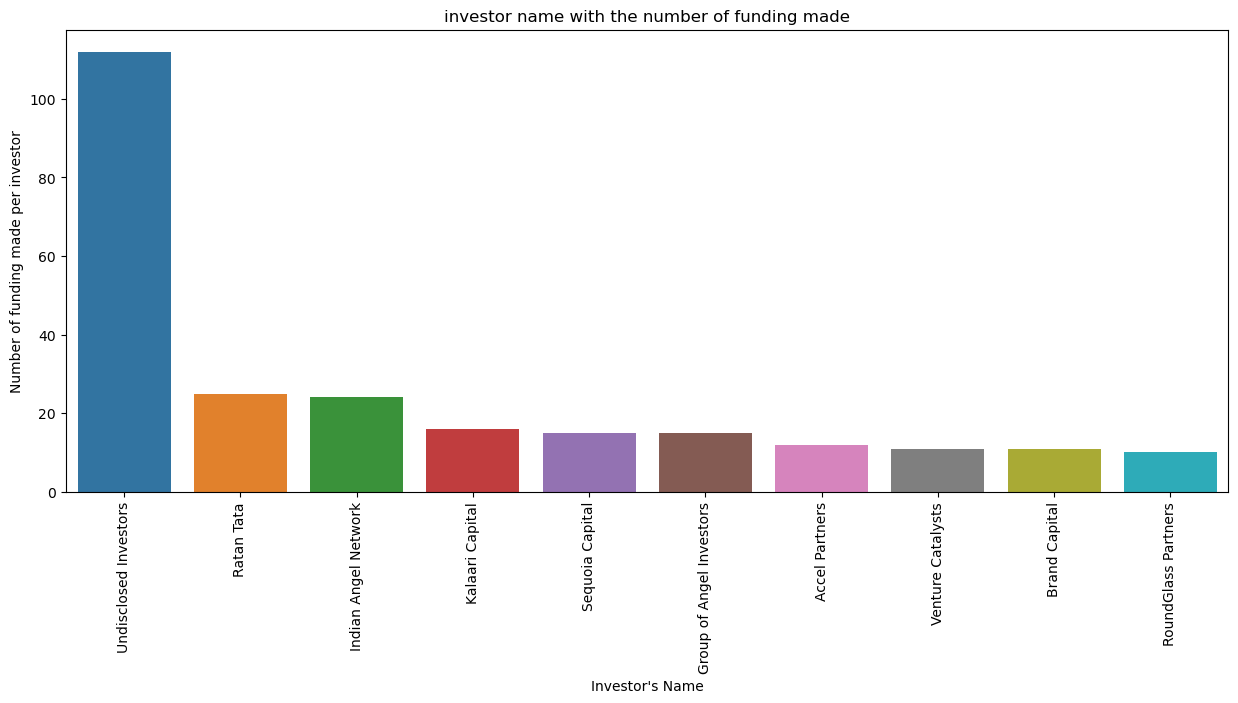

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(x=investor_name.index,y=investor_name.values)
plt.xticks(rotation='vertical')
plt.xlabel("Investor's Name")
plt.ylabel("Number of funding made per investor")
plt.title('investor name with the number of funding made')
plt.show()

### What are the different Types of Funding for Startups?

In [56]:

df.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001
2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,202001
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202001
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202001


In [57]:
df['InvestmentType'].value_counts()

Private Equity                 1356
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Pre-Series A                      4
Private Equity Round              4
Seed                              4
Seed / Angle Funding              3
pre-Series A                      2
Venture Round                     2
Equity                            2
Corporate Round                   2
Series E                          2
Series F                          2
Private                           1
Debt-Funding                      1
Term Loan                         1
Seed funding                      1
PrivateEquity               

In [58]:
df['InvestmentType'][df['InvestmentType']=='Seed Funding']='Seed Funding'
df['InvestmentType'][df['InvestmentType']=="""Seed/Angel Funding"""]='Seed Funding'
df['InvestmentType'][df['InvestmentType']=='Seed/ Angel Funding']='Seed Angel Funding'
df['InvestmentType'][df['InvestmentType']=='Seed / Angel Funding']='Seed Angel Funding'
df['InvestmentType'][df['InvestmentType']=='Angel / Seed Funding']='Seed Angel Funding'
df['InvestmentType'][df['InvestmentType']=='Seed / Angle Funding']='Seed Angel Funding'
df['InvestmentType'][df['InvestmentType']=='Private\\nEquity']='Private Equity'


In [60]:
investment_type=df['InvestmentType'].value_counts().head(15)

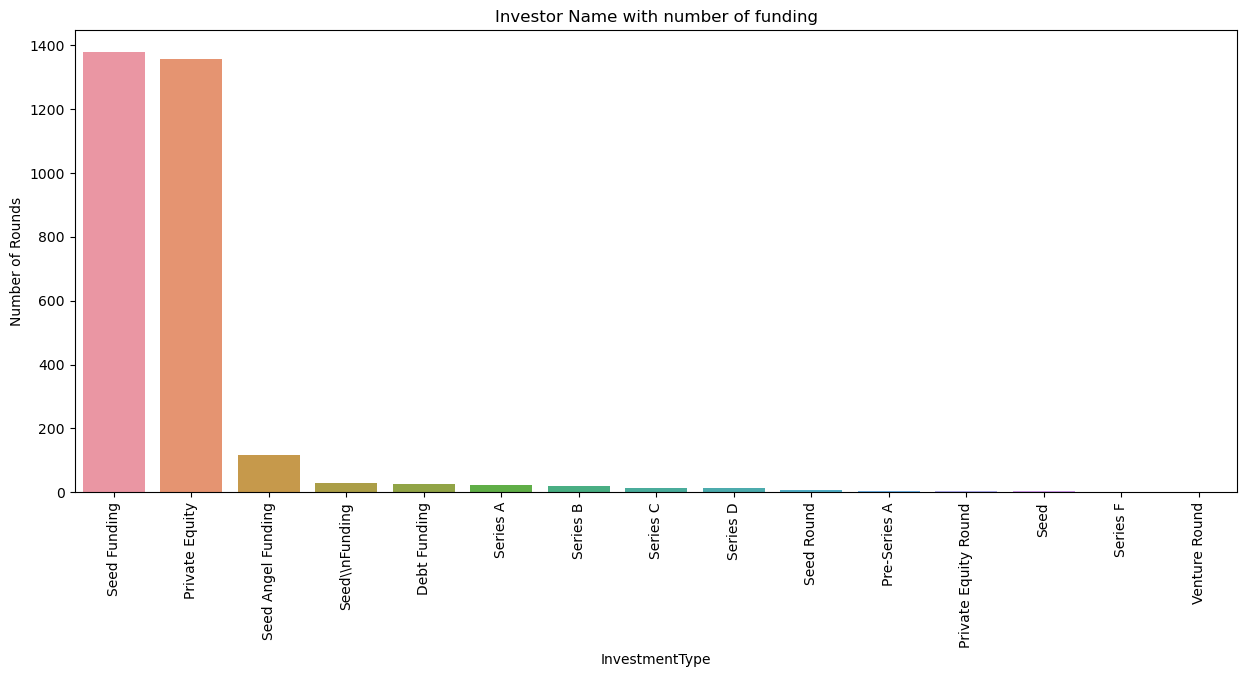

In [61]:
plt.figure(figsize=(15,6))
sns.barplot(x=investment_type.index,y=investment_type.values)
plt.xticks(rotation='vertical')
plt.xlabel('InvestmentType')
plt.ylabel('Number of Rounds')
plt.title('Investor Name with number of funding')
plt.show()

In [62]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [63]:
from wordcloud import WordCloud
name=df['InvestorsName'][~pd.isnull(df['InvestorsName'])]
wordcloud=WordCloud(max_font_size=50,width=600,height=300,background_color='cyan').generate(" ".join(name))
plt.figure(figsize=(12,6))
plt.title('Wordcloud for Investors Name',fontsize=20)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
!pip install wordcloud